# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: ruben santos
## Number: A49063

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q3.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: CIFAR-10 (small version)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve
import tensorflow.keras.datasets.cifar10 as cifar10

(X1,y1),(X2,y2)=cifar10.load_data()
y1=y1.squeeze()
y2=y2.squeeze()


# Question 1: 
## a) Select for training a subset of 20000 images from the matrix X1. Make sure that there are 2000 examples per class and that this new training data is shuffled. Also make shure that the test set (matrix X2) is ordered per class.
## b) Use generators for training and validation as specified in the cell below. Build a test generator. Make sure that this generator does not shuffle the data. Use this generator to go through the test set and retreive the class of the examples in it. Plot the class of the 10000 examples in the test set.
## c) Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
### - Use 6 convolutional layers
### - Use 3 pooling layers
##  Build this network, compile and train the network using the  training and validation generators. Make sure to go through the whole training and validation sets in each epoch. Plot the  the losses and the accuracies curves for the training and validation sets during the training process. Train the network for 25 epochs.  Comment the results. 
## d) Use the test generator to obtain the confusion matrix and the total number of erros in the test set.

## 1.a)

In [14]:

indices = []
for class_label in range(10):
    class_indices = np.where(y1 == class_label)[0]
    np.random.shuffle(class_indices)
    indices.extend(class_indices[:2000])
np.random.shuffle(indices)
X_train = X1[indices]
y_train = y1[indices]


# Shuffle the training data
shuffle_indices = np.arange(len(X_train))
np.random.shuffle(shuffle_indices)
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]


test_order = np.argsort(y2)
X_test = X2[test_order]
y_test = y2[test_order]
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (20000, 32, 32, 3) (20000,)
Test set shape: (10000, 32, 32, 3) (10000,)


## 1.b)

Training set shape: (20000, 32, 32, 3) (20000, 10)
Test set shape: (10000, 32, 32, 3) (10000, 10)


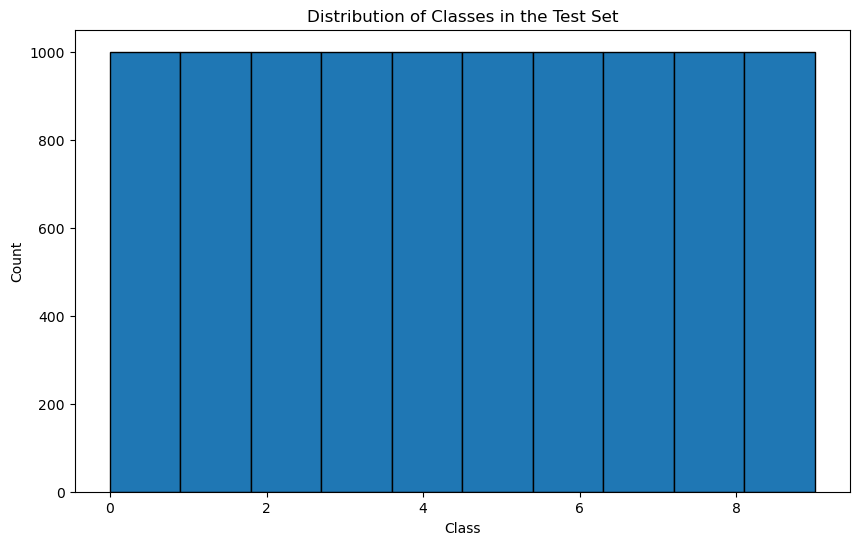

In [15]:
Y1=keras.utils.to_categorical(y_train)
Y2=keras.utils.to_categorical(y_test)


# X1 = np.array([tf.image.resize(img, (32, 32)) for img in X_train])
# print("Resized X1 shape:", X1.shape)
print("Training set shape:", X_train.shape, Y1.shape)
print("Test set shape:", X_test.shape, Y2.shape)


dataGen=ImageDataGenerator(rescale=1./255,validation_split=.25)
trainGen=dataGen.flow(X_train,Y1,batch_size=300,subset='training')
validGen=dataGen.flow(X_train,Y1,batch_size=100,subset='validation')

#testGen = ImageDataGenerator(rescale=1./255).flow(X_test, shuffle=False, batch_size=1)
testGen=ImageDataGenerator(rescale=1./255)
testGen=testGen.flow(X_test,y_test,batch_size=1000,shuffle=False)


# import time


test_steps = len(testGen)
test_classes = []
for _ in range(test_steps):
    images, labels = testGen.next()
    test_classes.extend(labels)

# Plot the class of the 10000 examples in the test set
plt.figure(figsize=(10, 6))
plt.hist(test_classes, bins=10, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in the Test Set')
# plt.xticks(range(num_classes))
plt.show()


## 1.c)

In [16]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D((2, 2)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, (1, 1), activation='relu'))
model.add(keras.layers.AveragePooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()



model.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# best_model = keras.callbacks.ModelCheckpoint('cnn_ex1.h5', monitor='val_loss', save_best_only=True)

# Por falta de tempo so foi possivel correr 5 epocas e nao 25
cnn_train = model.fit(trainGen, epochs=5, 
                      validation_data=validGen)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 32)         0         
 ePooling2D)                                          

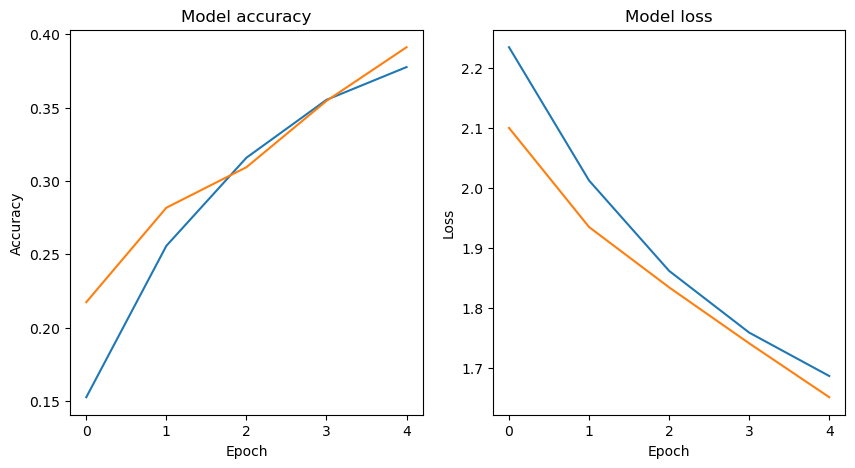

In [17]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cnn_train.history['accuracy'])
plt.plot(cnn_train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplot(1,2,2)
plt.plot(cnn_train.history['loss'])
plt.plot(cnn_train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## 1.d)

In [18]:
from sklearn.metrics import confusion_matrix

testGen.reset()
model_y_pred = model.predict(X2)
model_y_pred = np.argmax(model_y_pred, axis=1)

model_cm = confusion_matrix(y2, model_y_pred)
print(model_cm)
print('Total number of errors: ', np.sum(y2 != model_y_pred))
print('Accuracy: ', np.sum(y2 == model_y_pred) / y2.shape[0] * 100)

313/313 [==============================] - 3s 8ms/step
[[511 221   5   2   1   5   1  10 177  67]
 [ 26 848   0   1   0   2   1   0  49  73]
 [188 243  45  41   6 135  37 117  33 155]
 [120 241  17  38   1 221   7 102  15 238]
 [127 278   8  21  22  88  49 204  44 159]
 [ 70 218  23  20   2 309   2 142  24 190]
 [ 25 335   9  25   6  60  85 150  11 294]
 [ 80 316  10   4   1  60   1 156  16 356]
 [240 313   3   1   1   7   0   2 336  97]
 [ 34 508   3   2   0   3   0   4  69 377]]
Total number of errors:  7273
Accuracy:  27.27


# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the problem. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Define new generators (for training, validation and testing) so that they perform the correct pre-process of he data so it can be used by the network. 
### c)  Train the network for 25 epochs and show the results. Print the confusion matrix and the total number of errors in the test set. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve
import tensorflow.keras.datasets.cifar10 as cifar10
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

(X1,y1),(X2,y2)=cifar10.load_data()
y1=y1.squeeze()
y2=y2.squeeze()


## 2.a)

In [3]:

base_model = MobileNetV2(weights='imagenet', include_top=False, 
                         input_shape=(32, 32, 3))
base_model.trainable = False

modelM = keras.models.Sequential()
modelM.add(base_model)
modelM.add(keras.layers.Flatten())
modelM.add(keras.layers.Dense(10, activation='softmax'))
modelM.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
modelM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


## 2.b)

In [5]:
# add extra dimension for RGB channel
# X1 = np.concatenate((X1, X1, X1), axis=3)
# X2 = np.concatenate((X2, X2, X2), axis=3)

# # resize images to 32x32
# X1 = np.array([tf.image.resize(img, (32, 32)) for img in X1])
# X2 = np.array([tf.image.resize(img, (32, 32)) for img in X2])

# X1 = preprocess_input(X1)
# X2 = preprocess_input(X2)

In [6]:
# y1 = util.categorial..
# y2 = util.categorial..


dataGen=ImageDataGenerator(preprocessing_function=preprocess_input,
    # rescale=1./255,
                           validation_split=.25)
trainGen=dataGen.flow(X1,y1,batch_size=300,subset='training')
validGen=dataGen.flow(X1,y1,batch_size=100,subset='validation')

# dataTGen=ImageDataGenerator(preprocessing_function=preprocess_input)
testGen = ImageDataGenerator(preprocessing_function=preprocess_input).flow(X2, 
                                                                           shuffle=False, 
                                                  batch_size=100)

## 2.c)

In [9]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# best_model = keras.callbacks.ModelCheckpoint('ex2_bm.h5', monitor='val_loss', save_best_only=True)

# Por falta de tempo so foi possivel correr 5 epocas e nao 25
modelM_train = modelM.fit(trainGen, 
                        #   steps_per_epoch=len(trainGen),
                        step_per_epoch=5,
                          epochs=5, 
                          validation_data=testGen,
                        #   validation_steps=len(validGen)
                          )


Epoch 1/5
125/125 [==============================] - 43s 346ms/step - loss: 2.3014 - accuracy: 0.1193 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
125/125 [==============================] - 41s 332ms/step - loss: 2.2985 - accuracy: 0.1291 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
125/125 [==============================] - 40s 324ms/step - loss: 2.2962 - accuracy: 0.1490 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
125/125 [==============================] - 42s 339ms/step - loss: 2.2939 - accuracy: 0.1563 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
125/125 [==============================] - 52s 415ms/step - loss: 2.2917 - accuracy: 0.1479 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


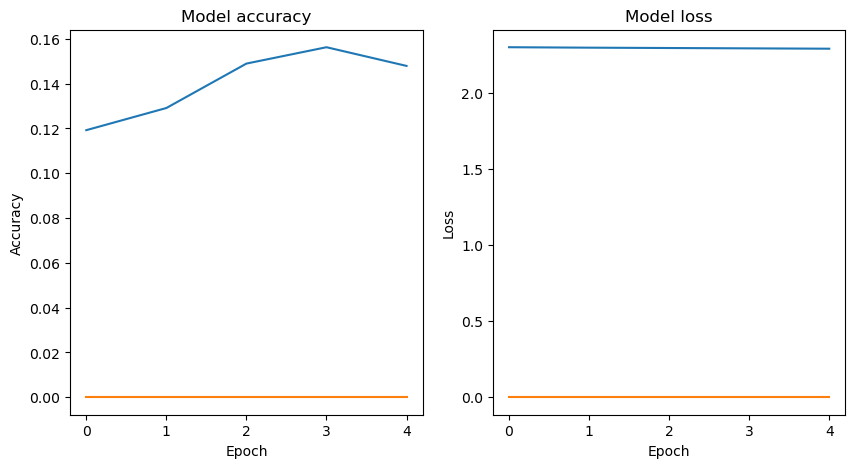

In [10]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modelM_train.history['accuracy'])
plt.plot(modelM_train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplot(1,2,2)
plt.plot(modelM_train.history['loss'])
plt.plot(modelM_train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [12]:
model_y_pred = modelM.predict(X2)
model_y_pred = np.argmax(model_y_pred, axis=1)

model_cm = confusion_matrix(y2, model_y_pred)
print(model_cm)
print('Total number of errors: ', np.sum(y2 != model_y_pred))
print('Accuracy: ', np.sum(y2 == model_y_pred) / y2.shape[0] * 100)

313/313 [==============================] - 9s 26ms/step
[[ 12   5   9 114  61 456  20 254   4  65]
 [ 13   6   7  94  22 108   6 720   5  19]
 [ 10   1  12 130  34 346  39 360   2  66]
 [  1   2  11 112  41 196  19 580   6  32]
 [  0   0  20 167  25 473  32 190   4  89]
 [  2   3   7 118  24 160  18 634   2  32]
 [  4   2   5 116  19 524  22 264   4  40]
 [  0   2  11 103  31 227  11 543   3  69]
 [ 10   9  12  85  48 172  10 607   2  45]
 [  8   2   2  68  13 118   4 758   7  20]]
Total number of errors:  9086
Accuracy:  9.139999999999999


Pode se observar que o 1 modelo performou melhor devido a tem menos exemplos de treino e de validação, logo o modelo não se torna tão complexo e não overfita tanto.
No entanto com mais epocas o 2 modelo poderia ter uma melhor performance, por é um  modelo mais complexo por ter o modelo MobileNetV2 como base.